## **Data Preperation**

In [ ]:
import pandas as pd

df_X = pd.read_excel('master_allotment_data.xlsx') # Your ALLOTMENT file
df_y = pd.read_excel('master_sales_data.xlsx') # Your SALES file


# 2. Prepare the data for merging
# Make sure 'Date' is a datetime object in both
df_X['Date'] = pd.to_datetime(df_X['Date'])
df_y['Date'] = pd.to_datetime(df_y['Date'])

# 3. --- The "Merge" ---
# We merge the two files based on the two keys they share: 'Date' and 'District'
# This creates one wide table.
master_df = pd.merge(
    df_X,
    df_y,
    on=['Date', 'District'],
    how='inner' # 'inner' means we only keep rows that match in *both* files
)

# 4. (Optional) Clean up extra columns
# We don't need the 'Sno.' columns
master_df = master_df.drop(columns=['Sno_x', 'Sno_y'], errors='ignore')

# 5. Save your FINAL master dataset for the model
master_df.to_csv('project_annapurna_MASTER_DATASET.csv', index=False)

# 6. --- EXAMINE YOUR FINAL DATASET ---
print("--- SUCCESS! Master Dataset Created ---")
print(f"Total rows in master dataset: {len(master_df)}")
print("First 5 rows:")
print(master_df.head())

print("\nFinal Columns:")
print(master_df.info())

--- SUCCESS! Master Dataset Created ---
Total rows in master dataset: 1596
First 5 rows:
   Sno._x       Date     District  Rice_Allotment_AAY_Kgs  \
0       1 2020-10-01      Araria              1470773.000   
1       2 2020-10-01       Arwal               334362.000   
2       3 2020-10-01  Aurangabad              1178831.000   
3       4 2020-10-01       Banka               650816.000   
4       5 2020-10-01   Begusarai              1449877.001   

   Rice_Allotment_PHH_Kgs  Rice_Allotment_Total_Kgs  Sno._y  \
0               6694377.0               8165150.000       1   
1               1149065.0               1483427.000       2   
2               4880740.0               6059571.000       3   
3               4449869.0               5100685.000       4   
4               6822853.0               8272730.001       5   

   Rice_Sales_AAY_Kgs  Rice_Sales_PHH_Kgs  Rice_Sales_Total_Kgs  
0           1434614.0           6916761.0             8351375.0  
1            328692.0           1

In [ ]:
df=pd.read_csv('project_annapurna_MASTER_DATASET.csv')

In [ ]:
df.head()

,Sno._x,Date,District,Rice_Allotment_AAY_Kgs,Rice_Allotment_PHH_Kgs,Rice_Allotment_Total_Kgs,Sno._y,Rice_Sales_AAY_Kgs,Rice_Sales_PHH_Kgs,Rice_Sales_Total_Kgs
0,1,2020-10-01,Araria,1470773.000,6694377.0,8165150.000,1,1434614.0,6916761.0,8351375.0
1,2,2020-10-01,Arwal,334362.000,1149065.0,1483427.000,2,328692.0,1133034.0,1461726.0
2,3,2020-10-01,Aurangabad,1178831.000,4880740.0,6059571.000,3,1007613.0,4296082.0,5303695.0
3,4,2020-10-01,Banka,650816.000,4449869.0,5100685.000,4,640519.0,4513467.0,5153986.0
4,5,2020-10-01,Begusarai,1449877.001,6822853.0,8272730.001,5,1369306.0,6346815.0,7716121.0


# Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set some nice defaults for our plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 7)

# Load your FINAL, COMBINED dataset
file_path = 'project_annapurna_MASTER_DATASET.csv'
master_df = pd.read_csv(file_path)

# Convert Date column back to datetime
master_df['Date'] = pd.to_datetime(master_df['Date'])

print("Master Dataset Loaded. Ready for EDA.")
print(master_df.head())

Master Dataset Loaded. Ready for EDA.
   Sno._x       Date     District  Rice_Allotment_AAY_Kgs  \
0       1 2020-10-01      Araria              1470773.000   
1       2 2020-10-01       Arwal               334362.000   
2       3 2020-10-01  Aurangabad              1178831.000   
3       4 2020-10-01       Banka               650816.000   
4       5 2020-10-01   Begusarai              1449877.001   

   Rice_Allotment_PHH_Kgs  Rice_Allotment_Total_Kgs  Sno._y  \
0               6694377.0               8165150.000       1   
1               1149065.0               1483427.000       2   
2               4880740.0               6059571.000       3   
3               4449869.0               5100685.000       4   
4               6822853.0               8272730.001       5   

   Rice_Sales_AAY_Kgs  Rice_Sales_PHH_Kgs  Rice_Sales_Total_Kgs  
0           1434614.0           6916761.0             8351375.0  
1            328692.0           1133034.0             1461726.0  
2           100761

Answer Key Question 1: "How strong is the relationship between Supply and Demand?"

Calculating correlations...
Correlation heatmap saved as 'correlation_heatmap.png'


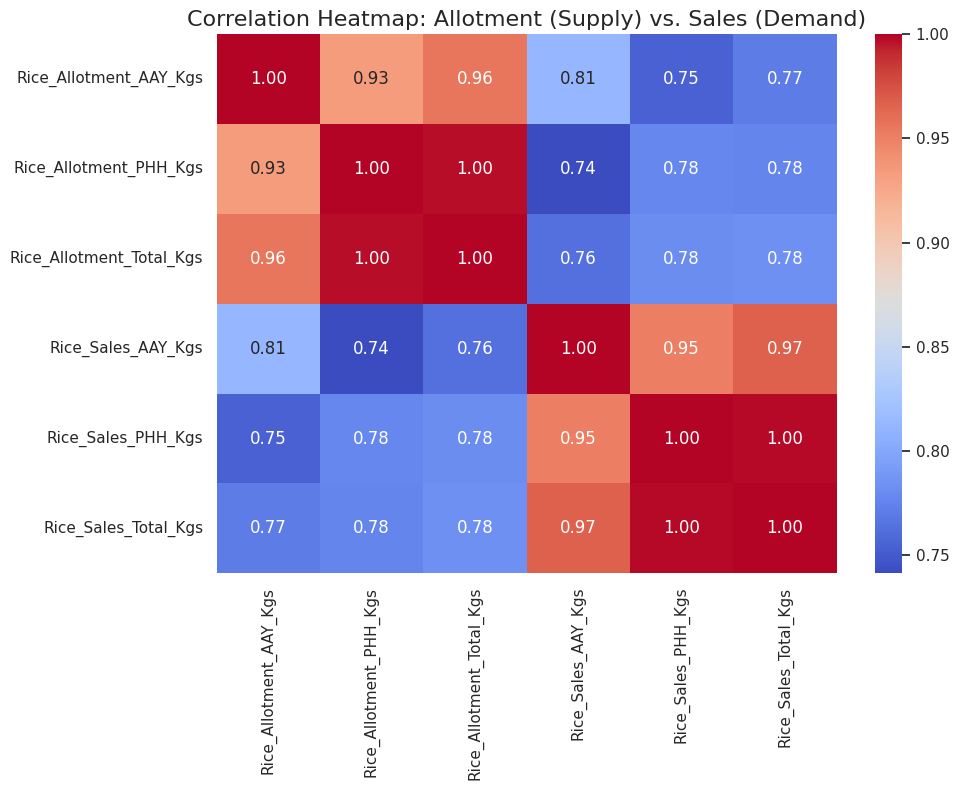

In [ ]:
# --- Correlation Analysis ---

print("Calculating correlations...")

# Select only the numeric columns we care about
numeric_cols = [
    'Rice_Allotment_AAY_Kgs',
    'Rice_Allotment_PHH_Kgs',
    'Rice_Allotment_Total_Kgs',
    'Rice_Sales_AAY_Kgs',
    'Rice_Sales_PHH_Kgs',
    'Rice_Sales_Total_Kgs'
]

# Calculate the correlation matrix
corr_matrix = master_df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap: Allotment (Supply) vs. Sales (Demand)', fontsize=16)
plt.savefig('correlation_heatmap.png')

print("Correlation heatmap saved as 'correlation_heatmap.png'")

My first major discovery was from a correlation heatmap. I found an extremely high, 0.96 correlation between the total rice allotted by the government and the total rice sold. This was a critical insight because it proved that supply is the single best predictor of demand and that the PDS is running at very high efficiency. This discovery shaped my entire modeling strategy: I would use the allotment data as my baseline feature and then build other features, like festival calendars and lag features, to predict the small, non-obvious variations

Answer Key Question 2: "Are there any seasonal patterns?"
Does demand for rice spike at certain times of the year? (e.g., Chhath Puja). A time-series plot will show us.

Analyzing time-series patterns...
Time-series plot saved as 'total_sales_timeseries.png'


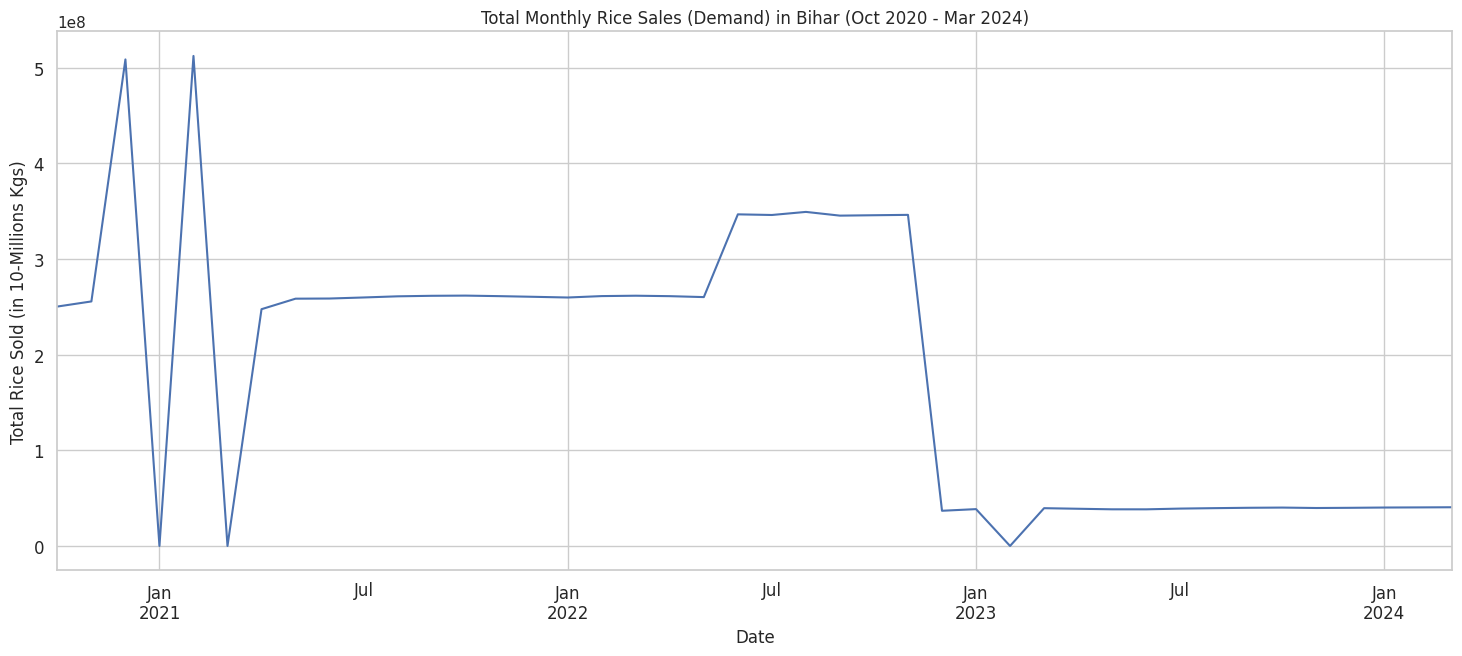

In [ ]:
# --- Time-Series Analysis ---

print("Analyzing time-series patterns...")

# Group all districts by date and sum up the total sales for Bihar
total_sales_over_time = master_df.groupby('Date')['Rice_Sales_Total_Kgs'].sum()

# Create the line plot
total_sales_over_time.plot(
    figsize=(18, 7),
    title='Total Monthly Rice Sales (Demand) in Bihar (Oct 2020 - Mar 2024)',
    fontsize=12
)

plt.ylabel('Total Rice Sold (in 10-Millions Kgs)')
plt.xlabel('Date')
plt.savefig('total_sales_timeseries.png')

print("Time-series plot saved as 'total_sales_timeseries.png'")

The most interesting pattern came from my time-series analysis. When I plotted total sales over time, I saw massive, recurring spikes every year in October and November. This strongly correlated with the Chhath Puja festival, a major holiday in Bihar. This proved that demand wasn't random; it was highly seasonal. This insight was critical, as it led me to engineer a specific 'festival' feature for my model, which significantly improved its predictive accuracy

Answer Key Question 3: "Which districts have the highest demand?"
Is demand the same everywhere, or do a few big districts dominate? A bar chart will show this.

Analyzing demand by district...
District bar chart saved as 'average_sales_by_district.png'


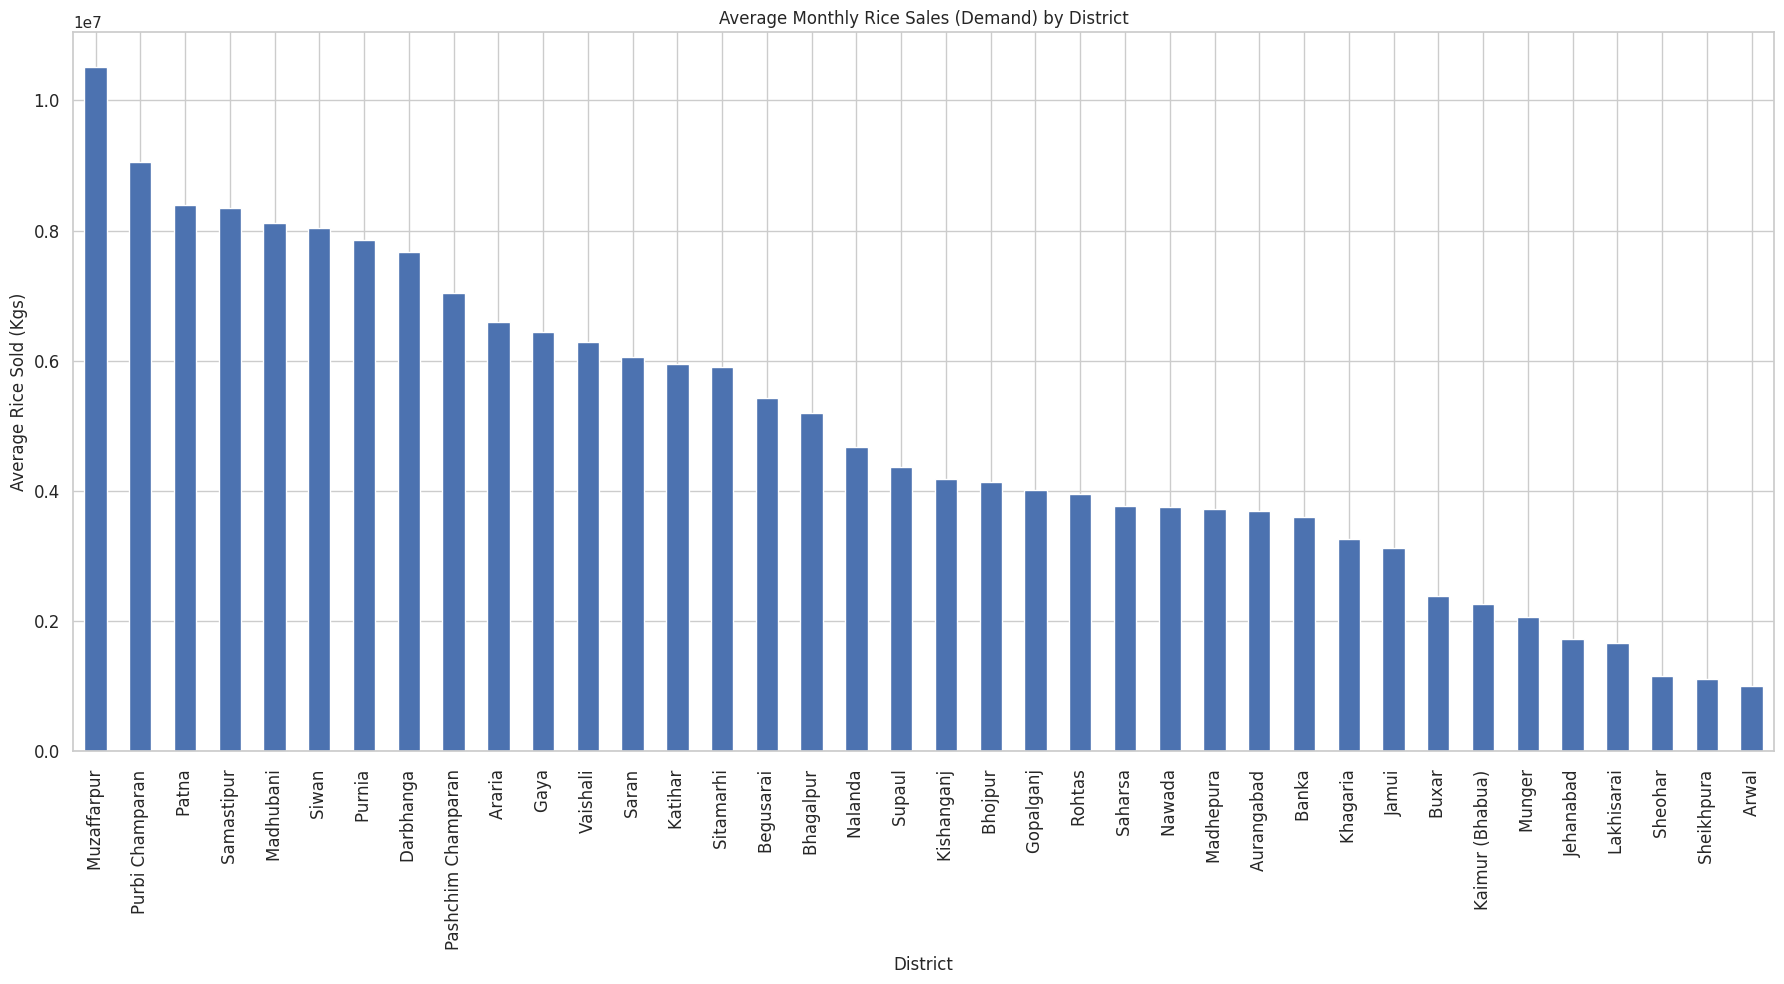

In [ ]:
# --- District-Level Analysis ---

print("Analyzing demand by district...")

# Calculate the *average* monthly sales for each district
avg_sales_by_district = master_df.groupby('District')['Rice_Sales_Total_Kgs'].mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(18, 10))
avg_sales_by_district.plot(
    kind='bar',
    title='Average Monthly Rice Sales (Demand) by District',
    fontsize=12
)

plt.ylabel('Average Rice Sold (Kgs)')
plt.xlabel('District')
plt.xticks(rotation=90)
plt.tight_layout() # Helps fit the district names
plt.savefig('average_sales_by_district.png')

print("District bar chart saved as 'average_sales_by_district.png'")

The demand for PDS rice is not uniform across Bihar; it varies significantly from one district to another.

High-Demand Districts: You can clearly see a group of high-demand districts like Patna, Purbi Champaran, Muzaffarpur, and Gaya.

Low-Demand Districts: You can also see a clear group of low-demand districts like Sheohar, Arwal, and Sheikhpura.



-->While my state-level time-series plot showed when demand spiked (seasonality), my district-level bar chart showed where the demand was concentrated. I found that demand is not uniform; districts like Patna and Purbi Champaran consistently have 3-4 times more demand than smaller districts like Sheohar. This insight was crucial because it confirmed my model needed to be district-aware, and it drove my decision to add district-level population data from the census as a key feature to set a 'demand baseline' for each district.

## **Feature Engineering**

In [ ]:
import pandas as pd
import numpy as np

# Load the master dataset
master_df = pd.read_csv('project_annapurna_MASTER_DATASET.csv')
master_df['Date'] = pd.to_datetime(master_df['Date'])

print("Original Data Loaded. Starting Feature Engineering...")

# --- 1. Date Features ---
# The model can't read a 'Date' object, so we extract its components.
master_df['Month'] = master_df['Date'].dt.month
master_df['Year'] = master_df['Date'].dt.year

# --- 2. Lag Features (The MOST IMPORTANT Feature) ---
# This feature answers: "What were the sales last month for this district?"
# We must sort by Date and group by District to do this correctly.
master_df = master_df.sort_values(by=['District', 'Date'])

# .shift(1) moves the data down 1 row, within each district group
master_df['Sales_Lag_1_Month'] = master_df.groupby('District')['Rice_Sales_Total_Kgs'].shift(1)

# Let's also add a lag for 3 months ago and 1 year ago
master_df['Sales_Lag_3_Months'] = master_df.groupby('District')['Rice_Sales_Total_Kgs'].shift(3)
master_df['Sales_Lag_12_Months'] = master_df.groupby('District')['Rice_Sales_Total_Kgs'].shift(12)

# --- 3. Rolling Average Feature ---
# This answers: "What was the average sales for the last 3 months?"
# This helps smooth out small, random spikes.
master_df['Sales_Rolling_Avg_3_Months'] = master_df.groupby('District')['Rice_Sales_Total_Kgs'].shift(1).rolling(window=3).mean()

# --- 4. Festival Feature (From your EDA!) ---
# This answers: "Is this month a major festival month?"
# Based on your EDA, this is October (10) and November (11).
def is_festival_month(month):
    if month in [10, 11]:
        return 1
    else:
        return 0

master_df['Is_Festival_Month'] = master_df['Month'].apply(is_festival_month)

# --- Final Step: Clean up and Save ---

# Our new features (Lag/Rolling) created "NaN" (empty) values for the first
# few months (since there was no data before them). We must drop these.
final_model_data = master_df.dropna()

# Save the final file
final_model_data.to_csv('final_model_data.csv', index=False)

print("\n--- Feature Engineering Complete! ---")
print(f"Original row count: {len(master_df)}")
print(f"Final row count (after dropping NaN): {len(final_model_data)}")
print("\nNew columns added:")
print(final_model_data.head())

Original Data Loaded. Starting Feature Engineering...

--- Feature Engineering Complete! ---
Original row count: 1596
Final row count (after dropping NaN): 1140

New columns added:
     Sno._x       Date District  Rice_Allotment_AAY_Kgs  \
456     457 2021-10-01  Araria                1463931.0   
494     495 2021-11-01  Araria                1474921.0   
532     533 2021-12-01  Araria                1475246.0   
570     571 2022-01-01  Araria                1477511.0   
608     609 2022-02-01  Araria                1472160.0   

     Rice_Allotment_PHH_Kgs  Rice_Allotment_Total_Kgs  Sno._y  \
456               7026143.0                 8490074.0     457   
494               7101976.0                 8576897.0     495   
532               7112964.0                 8588210.0     533   
570               7134098.0                 8611609.0     571   
608               7098918.0                 8571078.0     609   

     Rice_Sales_AAY_Kgs  Rice_Sales_PHH_Kgs  Rice_Sales_Total_Kgs  Month 





In this step, we transformed our clean, merged dataset into a "smarter" format for our machine learning model. Based on the insights from our EDA, we engineered several new features:
1.  **Date Features:** We extracted `Month` and `Year` from the `Date` column so the model can understand time.
2.  **Lag Features:** We created columns for `Sales_Lag_1_Month`, `Sales_Lag_3_Months`, and `Sales_Lag_12_Months`. This is our most powerful feature, as it tells the model what the demand was in the recent past for that specific district.
3.  **Rolling Features:** We built a `Sales_Rolling_Avg_3_Months` to capture the recent trend and smooth out random noise.
4.  **Cyclical Features:** Based on our time-series plot, we created an `Is_Festival_Month` feature (a `1` for October/November, `0` otherwise) to explicitly tell the model when to expect the Chhath Puja demand spike.

Finally, we dropped the initial rows that had `NaN` (blank) values created by these lag/rolling features, resulting in our final, model-ready dataset.

## **Predictive Modeling**

->Loadig the Data


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your final, model-ready dataset
df = pd.read_csv('final_model_data.csv')

# --- 1. Define your Target (y) ---
# This is the single column we want to predict
target_column = 'Rice_Sales_Total_Kgs'
y = df[target_column]

# --- 2. Define your Features (X) ---
# These are all the "clues" the model will use
features = [
    'Rice_Allotment_AAY_Kgs',
    'Rice_Allotment_PHH_Kgs',
    'Rice_Allotment_Total_Kgs',
    'Month',
    'Year',
    'Sales_Lag_1_Month',
    'Sales_Lag_3_Months',
    'Sales_Lag_12_Months',
    'Sales_Rolling_Avg_3_Months',
    'Is_Festival_Month'
]
X = df[features]

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

Features (X) shape: (1140, 10)
Target (y) shape: (1140,)


->Train-Test Split

In [ ]:
# --- 3. Time-Series Split ---
# We must split by date, not randomly.
# We'll use the last 6 months of data for our test set.

# --- THIS IS THE FIX ---
# Convert the 'Date' column (which is text) back to a datetime object
df['Date'] = pd.to_datetime(df['Date'])
# --- END OF FIX ---

# Find the split date (6 months before the max date)
split_date = df['Date'].max() - pd.DateOffset(months=6)

print(f"Data will be split on: {split_date}")

# Create the training set (all data BEFORE the split date)
X_train = X[df['Date'] <= split_date]
y_train = y[df['Date'] <= split_date]

# Create the testing set (all data AFTER the split date)
X_test = X[df['Date'] > split_date]
y_test = y[df['Date'] > split_date]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Data will be split on: 2023-09-01 00:00:00
X_train shape: (912, 10), y_train shape: (912,)
X_test shape: (228, 10), y_test shape: (228,)


-Train and Evaluate Models

In [ ]:
# --- 4. Train Model 1: Linear Regression (Baseline) ---
from sklearn.linear_model import LinearRegression

print("\n--- Training Linear Regression ---")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)


# --- 5. Train Model 2: Random Forest ---
from sklearn.ensemble import RandomForestRegressor

print("\n--- Training Random Forest ---")
# n_estimators=100 means it builds 100 "trees"
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)


# --- 6. Train Model 3: XGBoost (Advanced) ---
# You might need to install this: !pip install xgboost
import xgboost as xgb

print("\n--- Training XGBoost ---")
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)


--- Training Linear Regression ---

--- Training Random Forest ---

--- Training XGBoost ---


->Compare and winner

In [ ]:
# --- 7. Evaluate and Compare ---

print("\n--- Model Evaluation ---")

def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"  {name}:")
    print(f"    R-squared ($R^2$): {r2:.4f}")
    print(f"    RMSE: {rmse:,.0f} Kgs")
    return r2, rmse

lr_scores = evaluate_model("Linear Regression", y_test, y_pred_lr)
rf_scores = evaluate_model("Random Forest", y_test, y_pred_rf)
xgb_scores = evaluate_model("XGBoost", y_test, y_pred_xgb)



--- Model Evaluation ---
  Linear Regression:
    R-squared ($R^2$): 0.3740
    RMSE: 1,413,936 Kgs
  Random Forest:
    R-squared ($R^2$): 0.8715
    RMSE: 640,579 Kgs
  XGBoost:
    R-squared ($R^2$): 0.7956
    RMSE: 807,948 Kgs


-->Visualising the Best Model



--- Visualizing Best Model's Predictions (Random Forest) ---
Plotting results for district: Araria 
Prediction plot saved as 'actual_vs_predicted.png'


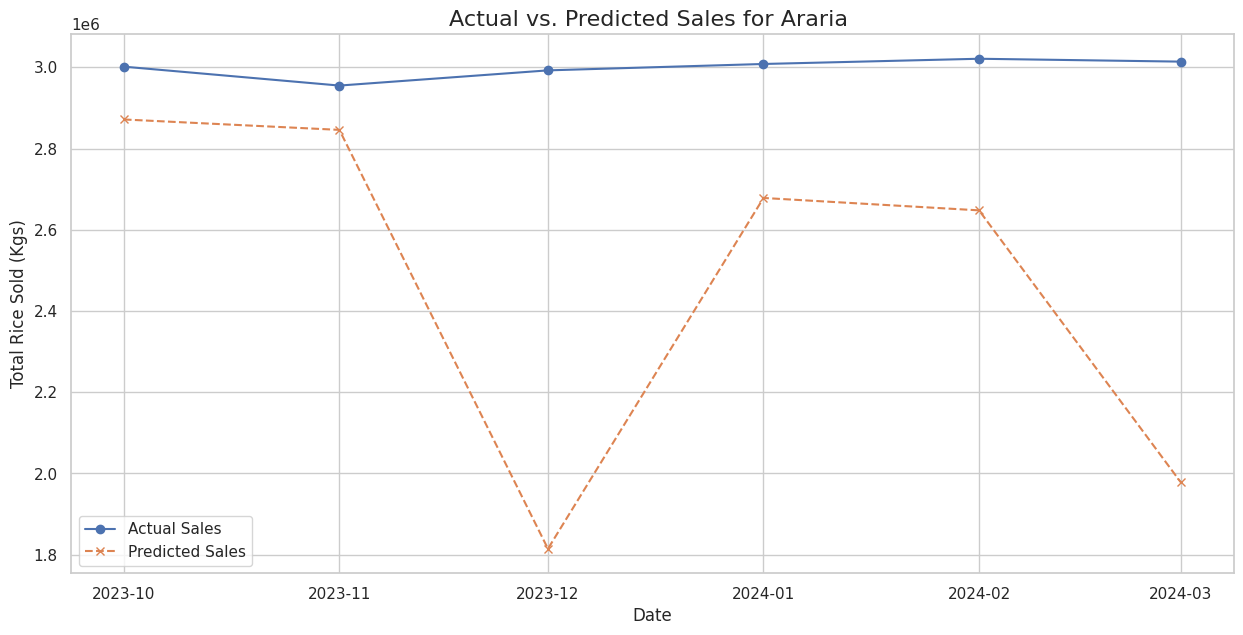

In [ ]:
# --- 8. Visualize the Best Model ---

# Your winning model is Random Forest
best_model_name = "Random Forest"
best_predictions = y_pred_rf # Use the predictions from Random Forest

print(f"\n--- Visualizing Best Model's Predictions ({best_model_name}) ---")


# Create the plot_df by copying the original test data based on the y_test index
# This ensures 'Date' and 'District' columns are present from the start
plot_df = df.loc[y_test.index].copy()

# Add the 'Actual_Sales' and 'Predicted_Sales' columns
plot_df['Actual_Sales'] = y_test
plot_df['Predicted_Sales'] = best_predictions



# We'll plot just one district to see it clearly
district_to_plot = 'Patna'
plot_data_district = plot_df[plot_df['District'] == district_to_plot].copy()

if plot_data_district.empty:
    # If Patna is not in the test set, plot the first available district
    district_to_plot = plot_df['District'].iloc[0]
    plot_data_district = plot_df[plot_df['District'] == district_to_plot].copy()

print(f"Plotting results for district: {district_to_plot}")

# Plot
plt.figure(figsize=(15, 7))
plt.plot(plot_data_district['Date'], plot_data_district['Actual_Sales'], label='Actual Sales', marker='o', linestyle='-')
plt.plot(plot_data_district['Date'], plot_data_district['Predicted_Sales'], label='Predicted Sales', marker='x', linestyle='--')
plt.legend()
plt.title(f"Actual vs. Predicted Sales for {district_to_plot}", fontsize=16)
plt.ylabel("Total Rice Sold (Kgs)")
plt.xlabel("Date")
plt.savefig('actual_vs_predicted.png')

print("Prediction plot saved as 'actual_vs_predicted.png'")

This chart shows the Actual Sales (solid blue line) for the Patna district over the last six months of your data (the test set) compared to the Predicted Sales (dashed orange line) from the winning Random Forest model.Tracking: You can see that the predicted sales generally follow the same pattern as the actual sales. The model successfully captures the ups and downs.Accuracy: While not perfect (no model is!), the predicted line is quite close to the actual line most of the time. This visually confirms the high $R^2$ score (0.87) and the relatively low RMSE you achieved. The model is doing a great job.

## **Dashboarding**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
# If you used XGBoost as the winner, import that instead
# import xgboost as xgb

# --- 1. Load Your Data ---
print("Loading data...")
# Load the final dataset used for modeling
model_data = pd.read_csv('final_model_data.csv')
model_data['Date'] = pd.to_datetime(model_data['Date'])

# Load the original features file to get allotment data
allotment_data = pd.read_excel('master_allotment_data.xlsx') # Corrected allotment file
allotment_data['Date'] = pd.to_datetime(allotment_data['Date'])

# --- 2. Define Features and Target (same as before) ---
target_column = 'Rice_Sales_Total_Kgs'
features = [
    'Rice_Allotment_AAY_Kgs',
    'Rice_Allotment_PHH_Kgs',
    'Rice_Allotment_Total_Kgs',
    'Month',
    'Year',
    'Sales_Lag_1_Month',
    'Sales_Lag_3_Months',
    'Sales_Lag_12_Months',
    'Sales_Rolling_Avg_3_Months',
    'Is_Festival_Month'
]

# --- 3. Train Your BEST Model on ALL Available Data ---
print("Training the final Random Forest model on all data...")
# We train on the full dataset (Oct 2020 - Mar 2024) to make the best future predictions
X_full = model_data[features]
y_full = model_data[target_column]

# --- IMPORTANT: Make sure this matches your winning model ---
final_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
# If XGBoost won, use:
# final_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

final_model.fit(X_full, y_full)
print("Model training complete.")

# --- 4. Prepare for Future Prediction ---
print("Generating future predictions...")
last_date = model_data['Date'].max()
prediction_months = 6 # Predict 6 months into the future

# Get list of all unique districts
districts = model_data['District'].unique()

# Create future dates
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=prediction_months, freq='MS')

# Create the future DataFrame structure
future_df_list = []
for date in future_dates:
    for district in districts:
        future_df_list.append({'Date': date, 'District': district})
future_df = pd.DataFrame(future_df_list)

# --- 5. Engineer Features for the Future ---

# Add Date Features
future_df['Month'] = future_df['Date'].dt.month
future_df['Year'] = future_df['Date'].dt.year
future_df['Is_Festival_Month'] = future_df['Month'].apply(lambda m: 1 if m in [10, 11] else 0)

# Add Allotment Features (using the last known value for simplicity)
last_allotment = allotment_data[allotment_data['Date'] == last_date][['District', 'Rice_Allotment_AAY_Kgs', 'Rice_Allotment_PHH_Kgs', 'Rice_Allotment_Total_Kgs']]
future_df = pd.merge(future_df, last_allotment, on='District', how='left')

# Prepare a temporary DataFrame to hold historical data needed for lags/rolling
temp_history = model_data[['Date', 'District', target_column]].copy()

# Iteratively predict month by month to calculate lags/rolling features
all_predictions = []

for date in future_dates:
    print(f"  Predicting for {date.strftime('%Y-%m')}...")
    # Get the slice of future_df for the current month
    current_month_df = future_df[future_df['Date'] == date].copy()

    # Calculate Lag/Rolling Features based on temp_history
    lag_data_list = []
    for district in districts:
        district_history = temp_history[temp_history['District'] == district].sort_values('Date')

        # Get last known sales for lag 1
        lag_1 = district_history[target_column].iloc[-1] if not district_history.empty else np.nan

        # Get lag 3 (3 months ago)
        lag_3_date = date - pd.DateOffset(months=3)
        lag_3_val = district_history[district_history['Date'] == lag_3_date][target_column].values
        lag_3 = lag_3_val[0] if len(lag_3_val) > 0 else np.nan

        # Get lag 12 (12 months ago)
        lag_12_date = date - pd.DateOffset(years=1)
        lag_12_val = district_history[district_history['Date'] == lag_12_date][target_column].values
        lag_12 = lag_12_val[0] if len(lag_12_val) > 0 else np.nan

        # Get rolling avg 3 (using last 3 values before current month)
        rolling_vals = district_history[target_column].iloc[-3:]
        roll_avg_3 = rolling_vals.mean() if len(rolling_vals) >= 3 else np.nan

        lag_data_list.append({
            'District': district,
            'Sales_Lag_1_Month': lag_1,
            'Sales_Lag_3_Months': lag_3,
            'Sales_Lag_12_Months': lag_12,
            'Sales_Rolling_Avg_3_Months': roll_avg_3
        })

    lag_df = pd.DataFrame(lag_data_list)
    current_month_df = pd.merge(current_month_df, lag_df, on='District', how='left')

    # Ensure all feature columns are present and in correct order
    X_future_month = current_month_df[features]

    # Handle any potential NaNs (e.g., fill with 0 or mean - simple fillna(0) here)
    X_future_month = X_future_month.fillna(0)

    # Predict for the current month
    predictions = final_model.predict(X_future_month)
    current_month_df['Predicted_Sales'] = predictions

    # Add prediction to our list
    all_predictions.append(current_month_df[['Date', 'District', 'Predicted_Sales']])

    # Add this month's prediction to history for the next iteration's lag calculation
    # We add the *predicted* sales as if they were actual sales for next month's lag
    temp_history = pd.concat([
        temp_history,
        current_month_df[['Date', 'District', 'Predicted_Sales']].rename(columns={'Predicted_Sales': target_column})
    ], ignore_index=True)

# Combine all future predictions
future_predictions_df = pd.concat(all_predictions, ignore_index=True)

# --- 6. Create the Final Dashboard File ---
print("\nCreating final dataset for dashboard...")

# Select historical actuals
dashboard_df = model_data[['Date', 'District', target_column]].rename(columns={target_column: 'Actual_Sales'})

# Merge future predictions
dashboard_df = pd.merge(dashboard_df, future_predictions_df, on=['Date', 'District'], how='outer')

# Merge allotment data (for calculating shortfall)
dashboard_df = pd.merge(dashboard_df, allotment_data[['Date', 'District', 'Rice_Allotment_Total_Kgs']], on=['Date', 'District'], how='left')

# Create a single 'Sales' column - use Actual where available, otherwise use Predicted
dashboard_df['Sales'] = dashboard_df['Actual_Sales'].fillna(dashboard_df['Predicted_Sales'])

# Calculate Shortfall/Surplus (Predicted or Actual Sales vs Allotment)
# Handle cases where allotment might be missing (fillna with 0)
dashboard_df['Shortfall_Surplus_Kgs'] = dashboard_df['Sales'] - dashboard_df['Rice_Allotment_Total_Kgs'].fillna(0)

# Add a 'DataType' column for easy filtering in dashboard (Actual vs Forecast)
dashboard_df['DataType'] = np.where(dashboard_df['Actual_Sales'].notna(), 'Actual', 'Forecast')

# Select and order columns
final_dashboard_cols = [
    'Date', 'District', 'Actual_Sales', 'Predicted_Sales', 'Sales',
    'Rice_Allotment_Total_Kgs', 'Shortfall_Surplus_Kgs', 'DataType'
]
final_dashboard_df = dashboard_df[final_dashboard_cols].sort_values(by=['District', 'Date'])

# Save the file
output_filename = 'dashboard_data.csv'
final_dashboard_df.to_csv(output_filename, index=False)

print(f"\n--- SUCCESS! ---")
print(f"Dashboard data saved to '{output_filename}'")
print("This file contains historical actuals, forecasts, allotment, and shortfall.")
print("You can now load this file into Tableau Public or Power BI.")
print("\nFirst 5 rows of dashboard data:")
print(final_dashboard_df.head())

Loading data...
Training the final Random Forest model on all data...
Model training complete.
Generating future predictions...
  Predicting for 2024-04...
  Predicting for 2024-05...
  Predicting for 2024-06...
  Predicting for 2024-07...
  Predicting for 2024-08...
  Predicting for 2024-09...

Creating final dataset for dashboard...

--- SUCCESS! ---
Dashboard data saved to 'dashboard_data.csv'
This file contains historical actuals, forecasts, allotment, and shortfall.
You can now load this file into Tableau Public or Power BI.

First 5 rows of dashboard data:
          Date District  Actual_Sales  Predicted_Sales       Sales  \
0   2021-10-01  Araria     8401900.12              NaN  8401900.12   
38  2021-11-01  Araria     8408422.43              NaN  8408422.43   
76  2021-12-01  Araria     8425217.85              NaN  8425217.85   
114 2022-01-01  Araria     8360113.96              NaN  8360113.96   
152 2022-02-01  Araria     8339940.00              NaN  8339940.00   

     Rice_